In [1]:
# importing the libraries
import pandas as pd 
import numpy as np

In [2]:
# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('seaborn version',sns.__version__)
sns.set_style('whitegrid')

seaborn version 0.11.2


In [3]:
# text data
import string
import re

In [4]:
df = pd.read_csv('bestsellers with categories.csv')

# DATA PREPARATION

In [5]:
df.head() 

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
df.rename(columns={"User Rating":"User_Rating"},inplace = True)

In [9]:
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling' 

In [10]:
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" "))

In [11]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59


In [14]:
punctuations = string.punctuation
print('list of punctuations : ' ,punctuations)

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
# percentage of punctuations
def count_punc(text):
    # this function is used to count the punctuations in the text
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text)-text.count(" "))*100,3)

In [16]:
# applying the function
df['punc%'] = df["Name"].apply(lambda x:count_punc(x))

In [17]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169


In [18]:
# visualizaing the data according to the genre
no_dup = df.drop_duplicates('Name')

In [19]:
g_count = no_dup['Genre'].value_counts()

In [20]:
no_dup.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169


In [21]:
g_count

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

C:\Users\sid80\AppData\Local\Temp\ipykernel_5984\2535908308.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


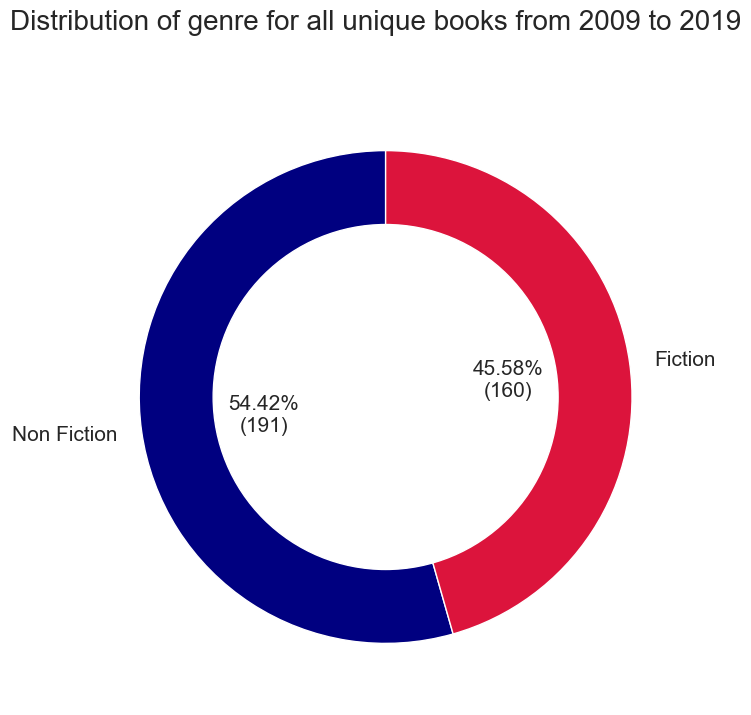

In [23]:
fig,ax = plt.subplots(figsize=(8,8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
centre_circle = plt.Circle((0,0),0.7,color='white')

plt.pie(x=g_count.values,labels=g_count.index, autopct=make_autopct(g_count.values),
         startangle=90,textprops={'size':15}, pctdistance=0.5, colors = genre_col)
ax.add_artist(centre_circle)

fig.suptitle('Distribution of genre for all unique books from 2009 to 2019',fontsize  = 20)
fig.show()